# 인공신경망 딥러닝 알고리즘 구현_케라스를 이용합니다_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/12/01

## 3장 인공신경망 모형 최적화
**딥러닝은 인공신경망 알고리즘을 이용하여 비선형 문제를 해결하기 위해 사용**
>- 연구자가 결정해야할 파라미터
>- **레이어의 수** : 인공신경망 모형에서 은닉층의 수를 지정
>- **뉴런의 수** : 입력층의 뉴런의 수는 입력 데이터의 변수의 수와 같아야하고, 출력층의 뉴런의 수는 분류분석의 경우 분류 레이블의 수이며, 회귀분석의 경우1개 , 분류 일때는 종속변수의 개수
>- **활성화함수** : 각 계층에서 사용할 활성화 함수를 지정 elu, relu , sigmoid 순서대로 작성
>- **가중치초기값** : 각 층의 가중치 초깃값을 지정
>- **드롭아웃비율** : 과적합을 줄이기 위해 일부 뉴런의 출력을 0으로 하기 위한 비율
>- **배치정규화** : 오차의 경사가 묻히는 현상을 줄이기 위해 은닉층 뉴런의 출력밧을 정규화 할지 여부, 분산이 묻히는 거 방지
>- **손실함수** : 예측한 값과 실제 값의 차이를 계산하는 함수, 분류 :  crossentropy
>- **옵티마이저** : 손실함수를 최소화 하도록 가중치를 갱신식키기 위한 옵티마이저
>- **학습률** : 옵티마이저가 사용할 학습률
>- **학습횟수** : 모든 데이터가 입력되어 가중치가 업데이트 되는 학습 횟수
>- **배치크기** : 1회 epoch가 학습될 동안 가중치가 업데이트 되어야하는 입력데이터의 크기(batch_size)
### 과적합(overfitting)
#### 과적합
>- 과소적합 : 훈련 데이터의 손실이 낮을 수록 테스트 데이터의 손실도 낮아지며, 이러한 상황은 모델의 성능이 개선될 여지가 많으므로 예외처리 하지 않습니다.
>- 과대적합 : 학습 데이터를 과하게 학습하는 것, 학습데이터는 일반적으로 전체 데이터의 부분 집합이므로 학습데이터에 대해서는 오차가 감소하지만 전체데이터에 오차가 증가
>- 과적합을 알 수 있는 방법 : 훈련 데이터셋의 오차(혹은 정확도), 검증 데이터셋의 오차(혹은 정확도)의 차이를 보고 판단

#### 과적합방지
>- 조기종료 (Early Stopping): 케라스의 fit() 함수는 매 학습마다 loss와 accuracy를 계산한 값을 반환, 조기 종료할 학습횟수를 정하는 것
>- 드롭아웃 (Drop Out) : 인공신경망의 일부 뉴런이 학습하지 않도록 하는 것
##### 드롭아웃을 하는 이유
>- 투표효과 : 무작위로 반복하면 투표에 의한 평균효과를 얻을 수 있음, 정규화와 비슷한 효과
>- 동조화를 피하는 효과 : 어떤 뉴런으 ㅣ가중치가 특정 뉴런의 영향을 받지 않기 때문에 뉴런들이 서로 동조화 된느 것을 피할 수 있음
>- 가중치규제 (Weight Regularization) : 가중치 값이 커지지않도록 제한
##### L1규제 L2규제
>- L1 규제 : 가중치의 절댓값에 대한 규제
>- L2 규제 : 가중치의 제곱에 대한 규제

### 경사소실(Gradient Vanishing)
#### 경사소실
>- 모델이 복잡해 질수록 은닉칭의 개수가 많은 인공신경망 모델 학습시켜야 함
**문제발생확률이 높음**
>- 경사소실 또는 폭주
>- 모델이 복잡하고 커질수록 학습시간이 오래걸림
>- 모델이 복잡할수록 과적합될 위험이 커짐
##### 역전파알고리즘
>- 출력층에서 입력층으로 오차 그래디언트를 흘려보내면서 각 뉴런의 입력값에 대한 손실함수의 그래디언트를 계산
>- 계산된 그래디언트를 경사 하강법 단계에서 각 가중치를 업데이트
>- 깊이가 깊은 심층신경망에서는 역전파 알고리즘이 입력층으로 전달됨에 따라 그래디언트가 점점 작아져 결국 가중치 매개변수가 업데이트 되지않음

##### 경사소실, 경사폭주가 일어나지않도록 해결법
>- **활성화 함수의 변경**
>- **가중치 초기값변경**
>- **작은 학습률**
>- **정규화**

#### 활성화함수
>- 선형결합된 값을 이용해서 다음 출력으로 보낼 값을 결정
>- **소프트맥스, 시그모이드** 항상 0과 1사이의 값 출력
>- elu, relu, sigmoid 순으로 사용해보는 게 좋음

##### 참고
>- 활성화 함수로 선형함수가 아닌 비선형함수를 사용하는 것이 좋음
>- DNN을 구성하려면 1개 이상의 비선형함수를 사용해야함

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

##### binary step
>- x가 0보다 작으면 0을 출력하고, 0보다 크면 1을 출력

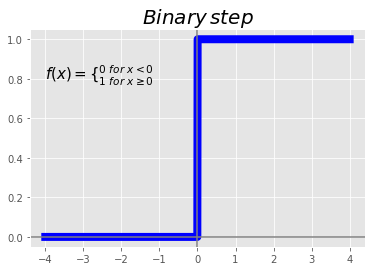

In [5]:
x = np.linspace(start = -4, stop = 4, num = 1000)
y = [1 if data >= 0 else 0 for data in x]

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$Binary\/step$', fontsize = 20)
plt.text(-4, 0.8, r'$f(x) = \{ \genfrac{}{}{0}{}{0 \/\/ for \/\/ x<0}{1 \/\/ for \/\/ x\geq0 }$', fontsize = 15)
plt.show()

##### sigmoid
>- 0 ~ 1사이의 값으로 출력
>- x의 값이 0보다 작을 수록 y값은 0에 수렴하고, x값이 0이면 y값은 0.5이며, x값이 0보다 클수록 y값은 1에 수렴
>- 시그모이드 함수는 항상 양의 값이 출력, 음수의 값이 있어도 출력은 항상 양수로 편향되어 출력됨

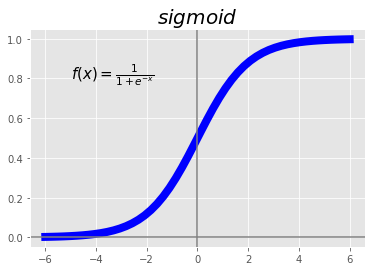

In [6]:
x = np.linspace(start = -6, stop = 6, num =50)
y = 1/(1+np.exp(-x))

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$sigmoid$', fontsize = 20)
plt.text(-5, 0.8, r'$f(x) = \frac{1}{1+e^{-x}}$', fontsize = 15)
plt.show()
          
        

##### tanh
>- 하이퍼볼릭탄젠트 함수는 -1에서 1사이의 값이 출력
>- x의 값이 0이면 y도 0이고, x의 값이 0보다 작을 수록 y값은 -1을 가짐

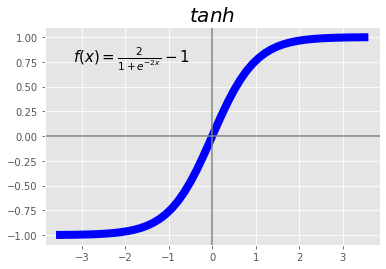

In [7]:
x = np.linspace(start = -3.5, stop = 3.5, num = 50)
y = np.tanh(x)

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$tanh$', fontsize = 20)
plt.text(-3.2, 0.75, r'$f(x)=\frac{2}{1+e^{-2x}}-1$', fontsize = 15)
plt.show()

##### softmax
>- x축에 대한 y축의 값의 모든 합은 1
>- 다중 분류 문제를 해결하기 위해 주로 사용
>- 최대값은 1이 아님
>- 그래프에서 x수가 많아지면 상대적으로 y의 최댓값은 작아짐

Text(2, 0.8, '$f(x)=\\frac{e^{x_i}}{\\sum_{j=1}^Je^x_i}\\/\\/ \\/\\/ for \\/ i = 1, \\/\\/...,\\/\\/j$')

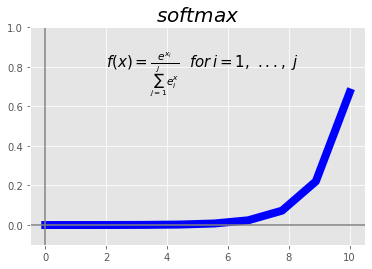

In [12]:
x = np.linspace(start = 0, stop = 10, num = 10)
def softmax(input):
    return np.exp(input) / (np.sum(np.exp(input)))
y = softmax(x)

plt.plot(x, y, c = 'blue', lw = 8)
plt.ylim(-0.1, 1)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')

plt.title(r'$softmax$', fontsize = 20)
plt.text(2, 0.8, r'$f(x)=\frac{e^{x_i}}{\sum_{j=1}^Je^x_i}\/\/ \/\/ for \/ i = 1, \/\/...,\/\/j$', fontsize = 15)

##### Gaussian
>- y의 출력은 평균이 0인 가우시안 분포를 따릅니다

ValueError: '$f(x)=e^{-x^2}$' is not a valid value for loc; supported values are 'left', 'center', 'right'

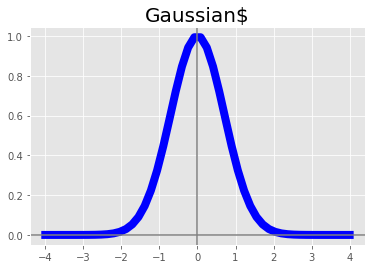

In [15]:
x = np.linspace(start = -4, stop = 4, num = 50)
y = np.exp(-(x**2))

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'Gaussian$', fontsize = 20)
plt.title(-4, 0.8, r'$f(x)=e^{-x^2}$', fontsize = 15)
plt.show()

##### ReLU
>- x가 0보다 작으면 y는 0이 출력, x가 0보다 크면 y는 x값 그대로 출력
>- 활성화 함수의 입력이 0보다 크렴 특정값에 수렴하지 않음

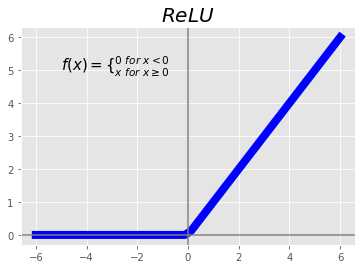

In [16]:
x = np.linspace(start = -6, stop = 6, num = 50)
y = [data if data >=0 else 0 for data in x]

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$ReLU$', fontsize = 20)
plt.text(-5, 5, r'$f(x)=\{ \genfrac{}{}{0}{}{0 \/\/ for \/\/ x<0}{x \/\/ for \/\/ x\geq0}}$', fontsize = 15)
plt.show()

##### LeakyReLU와 PReLU
>- a값에 따라 기울기가 달라짐
>- PReLU는 대규모 이미지 데이터셋에서 성능이 좋지만 소규모 데이터 셋에는 오버피팅 될 위험이 있음
>- a의 값이 0 인것이 ReLU

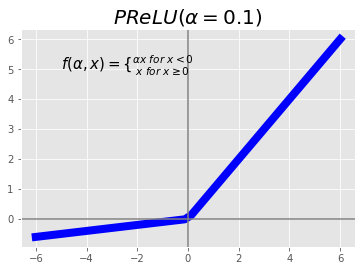

In [17]:
x = np.linspace(start = -6, stop = 6, num = 50)
y = [data if data >=0 else 0.1*data for data in x]

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$PReLU(\alpha=0.1)$', fontsize = 20)
plt.text(-5, 5, r'$f(\alpha, x)=\{\genfrac{}{}{0}{}{\alpha x \/\/ for \/\/ x<0}{x \/\/ for \/\/ x\geq0}}$', fontsize = 15)
plt.show()

##### ELU
>- 음수값이 0에 가까우면 기울기의 변화가 크고, 0에서 멀어질수록 기울기의 변화가 적음

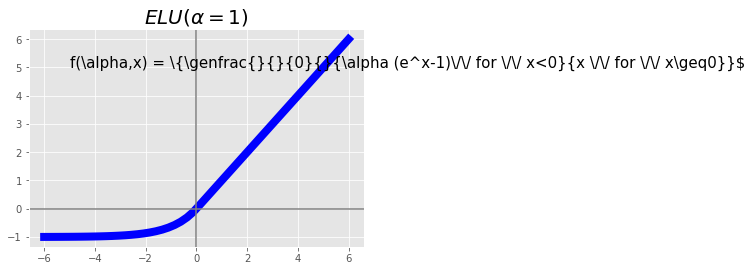

In [18]:
x = np.linspace(start = -6, stop = 6, num = 50)
y = [data if data>=0 else 1*(np.e**data-1) for data in x]

plt.plot(x, y, c = 'blue', lw = 8)
plt.axvline(0, c = 'grey')
plt.axhline(0, c = 'grey')
plt.title(r'$ELU(\alpha=1)$', fontsize = 20)
plt.text(-5, 5, r'f(\alpha,x) = \{\genfrac{}{}{0}{}{\alpha (e^x-1)\/\/ for \/\/ x<0}{x \/\/ for \/\/ x\geq0}}$', fontsize = 15)
plt.show()

##### 활성화 함수의 변화
>- ELU -> LeakyReLu -> ReLU -> tanh -> sigmoid순으로 사용해 볼 것을 권장

- from tensorflow.keras.activations import softmax
- from tensorflow.keras.layers import ELU, PReLU, InputLayer

- elu = ELU(alpha = 1)
- model.add(InputLayer (4))
- model.add(Dense(50, activation = 'sigmoid'))
- model.add(Dense(50, activation = PReLU()))
- model.add(Dense(50, activation = elu))
- model.add(Dense(3, activation = softmax))

#### 가중치 초기화
>- 가중치 초깃값을 어떻게 설정하느냐에 따라 학습이 잘 되거나 그렇지 않을 수 있음

##### 가중치 초깃값이 0이거나 모두 같을 경우
>- 가중치의 초깃값을 모두 0으로 초기화 하거나 모두 같은 값으로 초기화할 경우 모든 뉴런은 같은 값을 출력
>- 절대 같은 값으로 초기화 하면 안됨

##### 작은 난수인경우
>- 가중치 초깃값을 작게 초기화해야하며 동일한 초깃값을 가지지않도록 랜덤하게 초기화
>- 일반적으로 평균이 0이고, 표준편차가 0.01인 정규분포를 따르는 값으로 랜덤하게 초기화
>- 심층신경망에서 적합하지 않음

##### Xavier Initialization
>-glorot_uniform 클래스 제공

##### He Initialization
>- 세이비어 초깃값은 레이어가 깊어질 수록 출력값이 0으로 치우치는 문제 발생
>- he_normal 클래스 제공

##### 케라스의 가중치 초기화
>- kernel_initializer 매개변수를 이용해서 가중치 초기화 방법을 지정할 수 있음

- from tensorflow.keras.activations import softmax
- from tensorflow.keras.initializers import RandomNormal

- model.add(InputLayer(4))
- model.add(Dense(50, activation = 'sigmoid',
               kernel_initializer = 'he_normal'))
- model.add(Dense(50, activation = 'sigmoid',
               kernel_initializer = 'glorot_uniform'))
- model.add(Dense(30, activation = 'sigmoid', kernel_initializer = RandomNormal(0, 0.1)))
- model.add(Dense(3, activation = 'softmax'))

#### 배치정규화
>- Internal Covariance Shift : 네트워크의 각층이나 활성화함수마다 입력의 분포가 달라지는 현상
>- 학습 속도를 가속시킬 수 있는 근본적인 방법을 사용해야 하는데 각 층의 입력분포를 평균 0 , 표쥰편차 1인 입력으로 정규화시키는 방법
>- Batch Normalization
>- tf.keras.layers.BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer = 'zeros', moving_variance_initializer = 'ones', beta_regularizer = None, gamma_regularizer = None, beta_constraint = None, gamma_constraint = None)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(360, activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))

### 훈련최적화
#### 손실함수
>- 가중치 :  학습을 통해 손실을 최소화 하는 방향으로 추정
>- 많은 양의 데이터를 입력값으로 하여 수많은 은닉계층을 거쳐 결과를 추론
>- 추론한 값과 실제 값의 차이를 손실(Loss)로 정의하고, 이러한 차이를 표현한 함수를 손실함수라고 함

##### 회귀모형에서의 손실함수
>- 예측값과 실제값의 차이 절댓값을 취한 후 그 평균 계산(MAE)
>- 예측값과 실제값의 차이를 제곱해서 평균을 계산(MSE)

##### 분류모형에서의 손실함수
>- 다중분류 많이 사용 :  cross_entropy

<ipython-input-26-3b89e674d439>:5: RuntimeWarning: invalid value encountered in log
  _ = plt.plot(x, np.log(x))


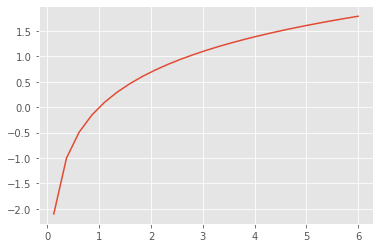

In [26]:
import matplotlib.pyplot as plt
import numpy as np

np.linspace(0.01, 1, 100)
_ = plt.plot(x, np.log(x))

<ipython-input-27-567702481861>:5: RuntimeWarning: invalid value encountered in log
  _ = plt.plot(x, -np.log(x))


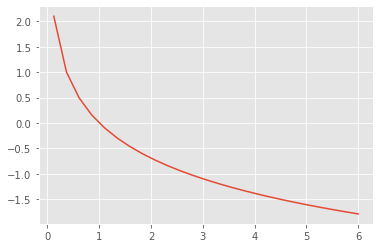

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.linspace(0.01, 1, 100)
_ = plt.plot(x, -np.log(x))

In [28]:
from tensorflow.keras import losses
model.compile(loss = losses.mean_squared_error, optimizer = 'sgd')

In [29]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

### 옵티마이저
##### 경사하강법
>- 가중치 손실를 최소화 하는 방향을 추정
>- 학습률이 너무 작으면 학습이 느리고, 너무 크면 수렴하지 않을 수 있음
>- svm, 로지스틱 회귀 등 머신러닝 모델을 훈련 네시키는데 널리 사용되는 알고리즘
>- 미니배치 : 샘플을 하나의 작은 집합으로 묶은 집합 단위로 가중치를 업데이트 하는 것

##### Momentum
>- 경사하강법을 통해 이동하는 과정에 일종의 관성을 주는 것

##### 네스테로프 모멘텀
>- 멈춰야 할 시점에도 관성에 의해 훨씬 더 멀리 갈 수도 있다는 단점, 모멘텀으로 이동을 반 정도 한 후 어떤 방식으로 이동해야 할지를 결정
>- 모멘텀 방식의 빠른 이동에 대한 이점을 누리면서도, 멈춰야 할 적절한 시점에서 제동을 거는데에 훨씬 용이

##### Adagrad(Adaptive Gradient)
>- 변수을을 업데이트할 때 각각의 변수마다 step size를 다르게 설정해서 이동하는 방식
>- 지금까지 많이 변화하지 않은 변수들은 step size 를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게하자

##### RMSProp
>- AdaGrad에서 수정량 감소를 통해 학습이 정체되는 단점을 극복한 방법
>- AdaGrad는 간단한 컨벡스 함수에서 잘 동작, 복잡한 다차원 곡면의 함수에는 전역 최솟값에 도달하기 전에 학습률이 0에 수렴할 수 있으므로 보완

##### AdaDelta
>- step size의 변화값의 제곱을 가지고 지수평균 값을 사용

##### Adam
>- 지금가지 계산 행돈 기울기의 지수평균을 저장하며 RMSProp와 유사하게 기울기의 제곱값의 지수평균을 저장

#### 옵티마이저 비교
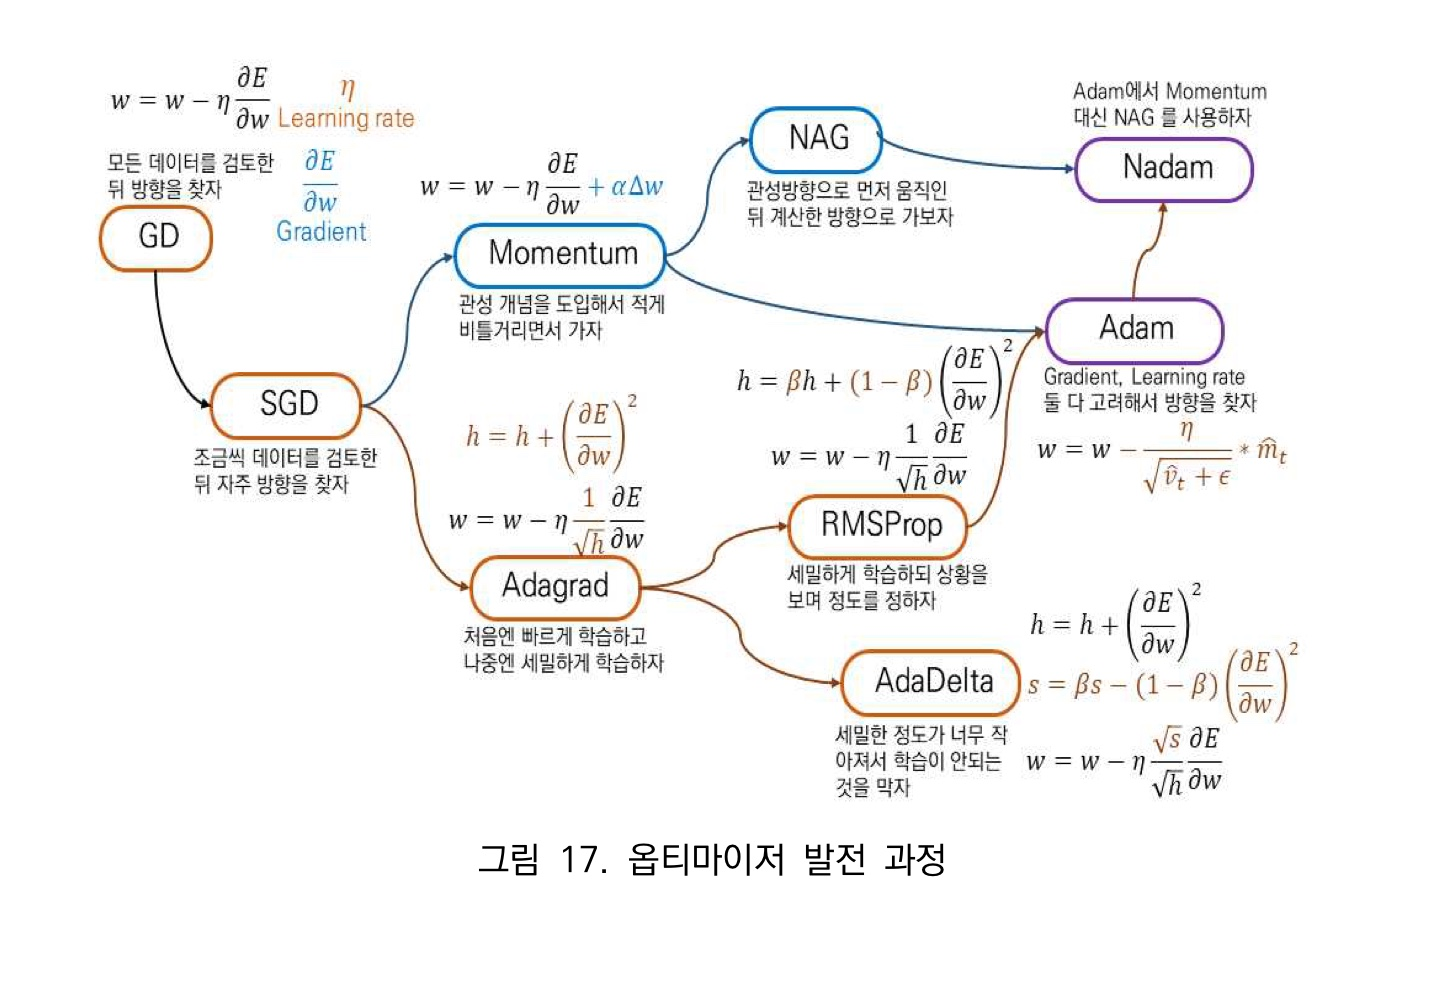

#### 케라스의 옵티마이저
>- SGD, RMSProp, Adagrad, Adadelta, Adam, Adamax, Nadam

